<a href="https://colab.research.google.com/github/zydusss/PyTorch/blob/main/Regression_using_PyTorch_Vs_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import torch.nn as nn
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Create Dataset

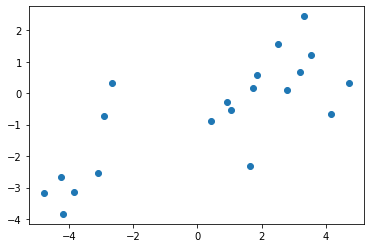

In [23]:
N = 20

# random data (-5,5)
X = np.random.random(N)*10 - 5

Y = 0.5*X - 1 + np.random.randn(N)

plt.scatter(X,Y)

Regression Using Python SKlearn

In [48]:
model = LinearRegression()
model.fit(X,Y)
Y_hat = model.predict(X)

In [51]:
predicted = model.predict(X)
model.score(X, Y) # Return the coefficient of determination of the prediction.

0.5934040708882469

In [50]:
w = model.coef_
b = model.intercept_
print(w,b)

[[0.41962926]] [-0.79524602]


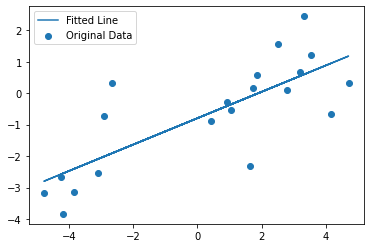

In [52]:
# Plot the model graph
plt.scatter(X,Y,label="Original Data")
plt.plot(X,predicted,label="Fitted Line")
plt.legend()
plt.show()

Regression with Pytorch

Please Note : PyTorch does not work with NumPy arrays rather it works with Torch Tensors

In [24]:
# Create linear regression model

model = nn.Linear(1,1) # 1 input and 1 output model

In [25]:
# Loss | Cost function | Objective Function
criterion = nn.MSELoss()

In [26]:
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [27]:
# We want to ensure our data is in shape (num of samples X num of dimensions)
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [28]:
# PyTorch uses float32 by default while Numpy create flot64 by default 
# convert Numpy arrays to totch sensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [29]:
type(inputs)

torch.Tensor

In [35]:
n_epochs = 50
losses = []

In [36]:
for it in range(n_epochs):
  # zero the parameter gradients | Internally PyTorch accumulates gradients when we call backward
  optimizer.zero_grad()

  #Forward pass
  outputs = model(inputs) # model is an object of type nn.Linear but we use it like a function
  loss = criterion(outputs,targets)

  # keep the loss so we can plot later 
  losses.append(loss.item())

  #Backward and optimize
  loss.backward() # Calculate gradient
  optimizer.step() # gradient step
  print(f'Epoch {it + 1}/{n_epochs}, Loss : {loss.item():.4f}')

Epoch 1/50, Loss : 1.8811
Epoch 2/50, Loss : 1.8383
Epoch 3/50, Loss : 1.7980
Epoch 4/50, Loss : 1.7602
Epoch 5/50, Loss : 1.7246
Epoch 6/50, Loss : 1.6913
Epoch 7/50, Loss : 1.6599
Epoch 8/50, Loss : 1.6305
Epoch 9/50, Loss : 1.6029
Epoch 10/50, Loss : 1.5769
Epoch 11/50, Loss : 1.5525
Epoch 12/50, Loss : 1.5296
Epoch 13/50, Loss : 1.5081
Epoch 14/50, Loss : 1.4879
Epoch 15/50, Loss : 1.4689
Epoch 16/50, Loss : 1.4511
Epoch 17/50, Loss : 1.4343
Epoch 18/50, Loss : 1.4186
Epoch 19/50, Loss : 1.4038
Epoch 20/50, Loss : 1.3900
Epoch 21/50, Loss : 1.3769
Epoch 22/50, Loss : 1.3647
Epoch 23/50, Loss : 1.3532
Epoch 24/50, Loss : 1.3424
Epoch 25/50, Loss : 1.3323
Epoch 26/50, Loss : 1.3227
Epoch 27/50, Loss : 1.3138
Epoch 28/50, Loss : 1.3054
Epoch 29/50, Loss : 1.2975
Epoch 30/50, Loss : 1.2901
Epoch 31/50, Loss : 1.2831
Epoch 32/50, Loss : 1.2766
Epoch 33/50, Loss : 1.2704
Epoch 34/50, Loss : 1.2647
Epoch 35/50, Loss : 1.2592
Epoch 36/50, Loss : 1.2542
Epoch 37/50, Loss : 1.2494
Epoch 38/5

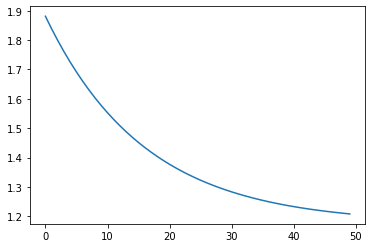

In [37]:
plt.plot(losses)

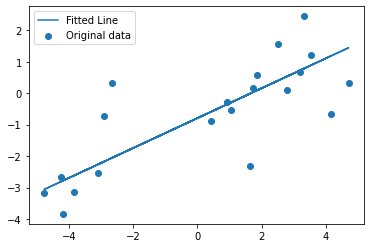

In [38]:
# Plot the graph

predicted = model(inputs).detach().numpy()
plt.scatter(X,Y, label = 'Original data')
plt.plot(X,predicted, label = 'Fitted Line')
plt.legend()
plt.show()

In [39]:
type(predicted)

numpy.ndarray

In [41]:
predicted[1:4]

array([[ 1.4429489 ],
       [-3.0602007 ],
       [ 0.08651328]], dtype=float32)

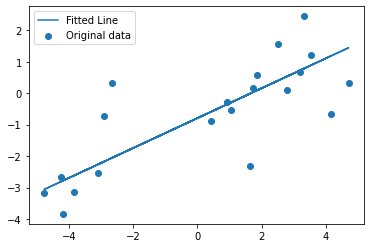

In [43]:
# Alternative way to plot model output graph without detach

with torch.no_grad():
  out = model(inputs).numpy()
  plt.scatter(X,Y, label = 'Original data')
  plt.plot(X,out, label = 'Fitted Line')
  plt.legend()
  plt.show()

Inspect Model Weights and Bias

In [45]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.47545737]] [-0.7933248]
